## 辨識手寫數字

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

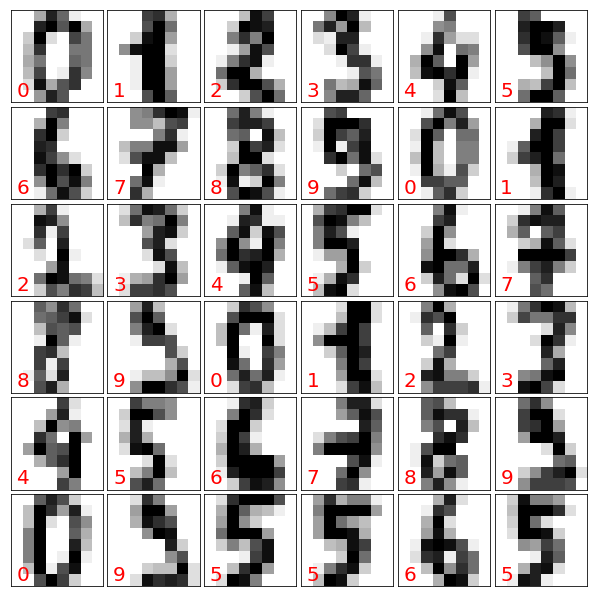

In [8]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]),color="red",fontsize=20)
plt.show()

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(digits.data)
X_scaled=scaler.transform(digits.data)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [12]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic',max_iter=100)
mlp.fit(X_scaled,digits.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [14]:
predicted = mlp.predict(X_scaled)

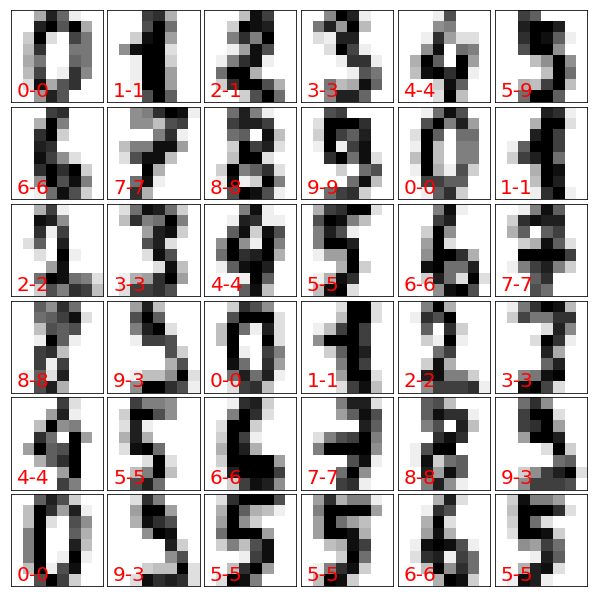

In [16]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7, '{}-{}'.format(str(digits.target[i]), predicted[i]) ,color="red",fontsize=20)
plt.show()

In [18]:
sum(digits.target == predicted) / len(digits.target)

0.9204229271007234

In [59]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic',max_iter=2000)
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [60]:
predicted = mlp.predict(X_scaled)

In [61]:
sum(digits.target == predicted) / len(digits.target)

0.9994435169727324

In [62]:
from PIL import Image
import numpy as np

img = Image.open('C:/Users/USER/Desktop/5.png')
img.load()
data = np.asarray( img, dtype="int32" )


In [63]:
data

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1]])

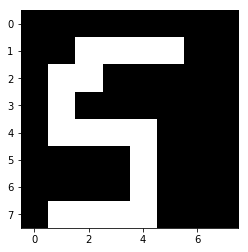

In [99]:
import matplotlib.pyplot as plt
plt.imshow(data,cmap=plt.cm.binary,interpolation='nearest')
plt.show()

In [101]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [103]:
1- data

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0]])

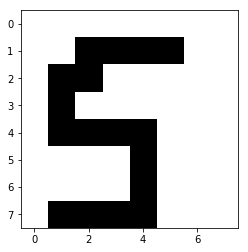

In [104]:
import matplotlib.pyplot as plt
plt.imshow((1- data),cmap=plt.cm.binary,interpolation='nearest')
plt.show()

In [105]:
(1- data) * 255

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255,   0,   0],
       [  0, 255, 255,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0],
       [  0, 255, 255, 255, 255,   0,   0,   0]])

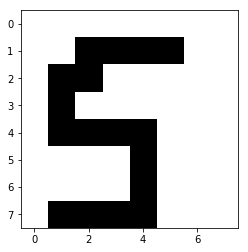

In [106]:
import matplotlib.pyplot as plt
plt.imshow(((1- data) * 255),cmap=plt.cm.binary,interpolation='nearest')
plt.show()

In [107]:
((1- data) * 255).ravel()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
       255,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0, 255,
         0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0])

In [108]:
item=scaler.transform([((1-data) * 255).ravel()])
item

array([[ 0.00000000e+00, -3.35016487e-01, -1.09493684e+00,
        -2.78643746e+00, -2.76424203e+00, -1.02065685e+00,
        -4.09723921e-01, -1.25022923e-01, -5.90775571e-02,
        -6.24009262e-01,  4.51328581e+01,  6.11151808e+01,
         5.11823363e+01,  4.07887803e+01, -5.14991458e-01,
        -1.30433381e-01, -4.46250733e-02,  7.05949192e+01,
         4.30811971e+01, -1.20543167e+00, -1.14964846e+00,
        -1.25998248e+00, -5.48805463e-01, -1.14221844e-01,
        -3.33797263e-02,  8.02790453e+01, -1.46862699e+00,
        -1.49990136e+00, -1.61406277e+00, -1.28625035e+00,
        -6.28895882e-01, -4.72323823e-02,  0.00000000e+00,
         7.26160457e+01,  3.91168148e+01,  3.92439882e+01,
         4.12516903e+01, -1.48986148e+00, -8.22694515e-01,
         0.00000000e+00, -6.13436689e-02, -5.31284098e-01,
        -1.05283456e+00, -1.12245711e+00,  3.95233105e+01,
        -1.44653841e+00, -7.98272248e-01, -8.87416172e-02,
        -3.54332626e-02, -4.03574986e-01, -1.33033057e+0

In [109]:
mlp.predict(item)

array([5])

In [116]:
from PIL import Image
import numpy as np

img = Image.open('C:/Users/USER/Desktop/6.png')
img.load()
data = np.asarray( img, dtype="int32" )


In [117]:
((1-data) * 255).ravel()

array([  0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0, 255, 255,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   0,
         0,   0,   0, 255,   0,   0, 255, 255,   0,   0,   0, 255, 255,
         0, 255, 255,   0,   0,   0,   0, 255, 255, 255,   0,   0])

In [118]:
item=scaler.transform([((1-data) * 255).ravel()])
item

array([[ 0.00000000e+00, -3.35016487e-01, -1.09493684e+00,
        -2.78643746e+00,  5.67290860e+01, -1.02065685e+00,
        -4.09723921e-01, -1.25022923e-01, -5.90775571e-02,
        -6.24009262e-01, -1.91557297e+00,  6.11151808e+01,
         5.11823363e+01, -1.35109507e+00, -5.14991458e-01,
        -1.30433381e-01, -4.46250733e-02, -7.27646281e-01,
         4.30811971e+01, -1.20543167e+00, -1.14964846e+00,
        -1.25998248e+00, -5.48805463e-01, -1.14221844e-01,
        -3.33797263e-02, -7.85105241e-01,  3.97247554e+01,
        -1.49990136e+00, -1.61406277e+00, -1.28625035e+00,
        -6.28895882e-01, -4.72323823e-02,  0.00000000e+00,
        -6.72372275e-01,  3.91168148e+01,  3.92439882e+01,
         4.12516903e+01,  4.19586638e+01, -8.22694515e-01,
         0.00000000e+00, -6.13436689e-02, -5.31284098e-01,
         3.79610458e+01, -1.12245711e+00, -1.22603292e+00,
         4.33379039e+01,  5.80966374e+01, -8.87416172e-02,
        -3.54332626e-02, -4.03574986e-01,  4.38589970e+0

In [119]:
mlp.predict(item)

array([6])

## TensorFlow
- 安裝 TensorFlow 與 Keras
- pip install tensorflow
- pip install keras

In [120]:
! pip install tensorflow

  Running setup.py bdist_wheel for gast: started
  Running setup.py bdist_wheel for gast: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\9a\1f\0e\3cde98113222b853e98fc0a8e9924480a3e25f1b4008cedb4f
  Running setup.py bdist_wheel for termcolor: started
  Running setup.py bdist_wheel for termcolor: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\23\35\1d\48c0a173ca38690dd8dfccfa47ffc750db48f8989ed898455c
  Running setup.py bdist_wheel for html5lib: started
  Running setup.py bdist_wheel for html5lib: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\50\ae\f9\d2b189788efcf61d1ee0e36045476735c838898eef1

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [121]:
! pip install keras

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### 既有範例

In [ ]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from tensorflow.python.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')     # for division
x_test = x_test.astype('float32')
x_train /= 255                          # normalise
x_test /= 255

# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200, batch_size=128)

### 用在sklearn 的 load_digits上

In [ ]:
import  keras
from  keras.models import Sequential
from  keras.layers import Dense

In [ ]:
model2 = Sequential()
model2.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu', input_shape=(64,)))
model2.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))

num_classes = 10
y = to_categorical(digits.target, num_classes)

model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(X_scaled, y, epochs=1000, batch_size=128)

In [146]:
model2.predict(item)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)